#Import all the dataframes required.

In [2]:
import pandas as pd
import numpy as np
import glob
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

MemoryError: Out of memory interning an attribute name

In [2]:
xlsx = pd.ExcelFile('TUS106_L01_1.xlsx')
df_L04 = pd.read_excel(xlsx, sheet_name='L04')
df_L04.head()

,Common_ID,Level,Filler,srl_of_member,age,relationship of the informant with the household member,day_of_week,type of the day,response code,Blank,NSC,MULT
0,TUS10202106201910111901311011001,4,0,1,44,02,1,1,1,...,4,1281550
1,TUS10202106201910111901311011001,4,0,2,32,01,1,1,1,...,4,1281550
2,TUS10202106201910111901311011002,4,0,1,38,01,5,1,1,...,4,1281550
3,TUS10202106201910111901311011002,4,0,2,32,01,5,1,1,...,4,1281550
4,TUS10202106201910111901311011002,4,0,4,7,02,5,1,1,...,4,1281550


In [3]:
xlsx = pd.ExcelFile('TUS106_L01_1.xlsx')
df_L02 = pd.read_excel(xlsx, sheet_name='L02')
df_L02.head()

,Common_ID,Level,Filler,srl_of_member,Relation to head,Gender,Age,marital status,highest level of education,usual principal activity: status (code),industry of work: 2-digit of NIC 2008,Blank,NSC,MULT
0,TUS10202106201910111901311011001,2,0,1,1,1,44,2,04,31.0,20.0,NaN,NaN,NaN
1,TUS10202106201910111901311011001,2,0,2,2,2,32,2,11,31.0,85.0,NaN,NaN,NaN
2,TUS10202106201910111901311011001,2,0,3,5,1,5,1,02,NaN,NaN,NaN,NaN,NaN
3,TUS10202106201910111901311011001,2,0,4,5,2,3,1,01,NaN,NaN,NaN,NaN,NaN
4,TUS10202106201910111901311011002,2,0,1,1,1,38,2,04,11.0,1.0,NaN,NaN,NaN


In [4]:
df_L04.nunique()

Common_ID                                                   138803
Level                                                            2
Filler                                                           5
srl_of_member                                                   27
age                                                            205
relationship of the informant with the household member          5
day_of_week                                                      8
type of the day                                                  3
response code                                                    3
Blank                                                            6
NSC                                                              6
MULT                                                          8825
dtype: int64

In [4]:
# File paths
input_file = 'TUS106_L05.txt'
output_prefix = 'subset_'

# Chunk size (number of rows per subset)
chunk_size = 1000000  # Adjust as needed

# Define the column lengths
column_lengths = [32, 2, 2, 3, 3, 3, 5, 5, 1, 1, 1, 3, 1, 2, 1, 61, 3, 10]

# Function to split a line into columns based on the specified lengths
def split_line(line, lengths):
    line = line.strip()  # Remove leading and trailing whitespace
    line = line[:sum(lengths)]  # Trim the line to match expected length
    columns = []
    start = 0
    for length in lengths:
        columns.append(line[start:start+length].strip())  # Trim each column
        start += length
    return columns

# Function to process a chunk of data
def process_chunk(chunk, column_lengths):
    data = []
    for line in chunk:
        if len(line.strip()) >= sum(column_lengths):
            data.append(split_line(line, column_lengths))
    return data

# Counters for output files
file_count = 1
row_count = 0

# Read the large text file in chunks
try:
    with open(input_file, 'r') as file:
        chunk = []
        for line in file:
            chunk.append(line)
            if len(chunk) >= chunk_size:
                # Process the current chunk
                data = process_chunk(chunk, column_lengths)
                
                # Create a DataFrame from the data
                df = pd.DataFrame(data, columns=[f'Column_{i+1}' for i in range(len(column_lengths))])
                df.rename(columns={'Column_1': 'Common_ID', 'Column_2': 'Level', 'Column_3': 'Filler', 'Column_4': 'srl_of_member', 'Column_5': 'age',
                                   'Column_6': 'srl_no_of_act', 'Column_7': 'time_from', 'Column_8': 'time_to', 'Column_9': 'whether_multiple_act',
                                   'Column_10': 'whether_simul_act', 'Column_11': 'whether_major_act', 'Column_12': '3d_act_code', 'Column_13': 'where_performed',
                                   'Column_14': 'unpaid_paid_status', 'Column_15': 'enterprise_type', 'Column_16': 'blank', 'Column_17': 'nsc', 'Column_18': 'mult'}, inplace=True)
                
                # Determine the output file name
                output_file = f'{output_prefix}{file_count}.csv'
                
                # Save the DataFrame to a CSV file
                df.to_csv(output_file, index=False)
                
                # Increment file count and update row count
                file_count += 1
                row_count += len(chunk)
                
                # Optional: Display progress
                print(f'Saved {output_file} with {len(chunk)} rows.')
                
                # Reset the chunk
                chunk = []
        
        # Process any remaining lines in the last chunk
        if chunk:
            data = process_chunk(chunk, column_lengths)
            df = pd.DataFrame(data, columns=[f'Column_{i+1}' for i in range(len(column_lengths))])
            df.rename(columns={'Column_1': 'Common_ID', 'Column_2': 'Level', 'Column_3': 'Filler', 'Column_4': 'srl_of_member', 'Column_5': 'age',
                               'Column_6': 'srl_no_of_act', 'Column_7': 'time_from', 'Column_8': 'time_to', 'Column_9': 'whether_multiple_act',
                               'Column_10': 'whether_simul_act', 'Column_11': 'whether_major_act', 'Column_12': '3d_act_code', 'Column_13': 'where_performed',
                               'Column_14': 'unpaid_paid_status', 'Column_15': 'enterprise_type', 'Column_16': 'blank', 'Column_17': 'nsc', 'Column_18': 'mult'}, inplace=True)
            output_file = f'{output_prefix}{file_count}.csv'
            df.to_csv(output_file, index=False)
            row_count += len(chunk)
            print(f'Saved {output_file} with {len(chunk)} rows.')
except FileNotFoundError:
    print(f"The file {input_file} was not found.")
except IOError:
    print(f"An error occurred while reading the file.")

# Print summary
print(f'Total rows processed: {row_count}')
print(f'Total number of subset files created: {file_count}')


Saved subset_1.csv with 1000000 rows.
Saved subset_2.csv with 1000000 rows.
Saved subset_3.csv with 1000000 rows.
Saved subset_4.csv with 1000000 rows.
Saved subset_5.csv with 1000000 rows.
Saved subset_6.csv with 1000000 rows.
Saved subset_7.csv with 1000000 rows.
Saved subset_8.csv with 1000000 rows.
Saved subset_9.csv with 1000000 rows.
Saved subset_10.csv with 436778 rows.
Total rows processed: 9436778
Total number of subset files created: 10


In [5]:
# Combine CSV files into a single DataFrame
file_list = glob.glob('subset_*.csv')
combined_df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)

C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\562515025.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)
C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\562515025.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)
C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\562515025.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)
C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\562515025.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat((pd.read_csv(file)

In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9436777 entries, 0 to 9436776
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Common_ID             object 
 1   Level                 int64  
 2   Filler                int64  
 3   srl_of_member         int64  
 4   age                   int64  
 5   srl_no_of_act         int64  
 6   time_from             object 
 7   time_to               object 
 8   whether_multiple_act  float64
 9   whether_simul_act     float64
 10  whether_major_act     int64  
 11  3d_act_code           int64  
 12  where_performed       int64  
 13  unpaid_paid_status    int64  
 14  enterprise_type       float64
 15  blank                 object 
 16  nsc                   float64
 17  mult                  object 
dtypes: float64(4), int64(9), object(5)
memory usage: 1.3+ GB


In [10]:
combined_df.isnull().sum()

Common_ID                     0
Level                         0
Filler                        0
srl_of_member                 0
age                           0
srl_no_of_act                 0
time_from                     0
time_to                       0
whether_multiple_act    1735661
whether_simul_act       7886452
whether_major_act             0
3d_act_code                   0
where_performed               0
unpaid_paid_status            0
enterprise_type         8912039
blank                   9429119
nsc                     9436777
mult                          0
dtype: int64

##Compute Duration from Time to and time from 

In [6]:
# Convert 'time_from' and 'time_to' to datetime
combined_df['time_from'] = pd.to_datetime(combined_df['time_from'], format='%H:%M')
combined_df['time_to'] = pd.to_datetime(combined_df['time_to'], format='%H:%M')

# Calculate the duration of each activity in minutes
combined_df['duration'] = (combined_df['time_to'] - combined_df['time_from']).dt.total_seconds() / 60

# Adjust for activities that span midnight
combined_df.loc[combined_df['duration'] < 0, 'duration'] += 24 * 60

##Defining Paid and Unpaid activities

In [7]:
# Classify activities as paid or unpaid
paid_status = [13, 14, 15, 16, 17, 18]
combined_df['activity_type'] = np.where(combined_df['unpaid_paid_status'].astype(int).isin(paid_status), 'Paid', 'Unpaid')

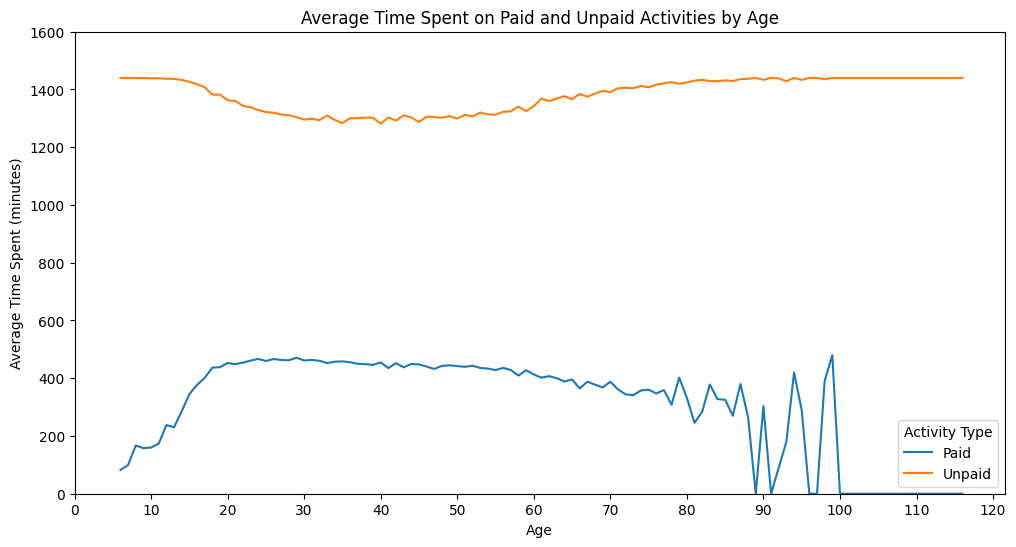

In [10]:
# Aggregate time spent on paid and unpaid activities per person per day
person_activity = combined_df.groupby(['Common_ID', 'activity_type', 'age']).agg({'duration': 'sum'}).reset_index()

# Ensure the aggregated time does not exceed 1440 minutes per day
person_activity['duration'] = person_activity['duration'].clip(upper=1440)

# Calculate average time spent on paid and unpaid activities by age
average_time_by_age = person_activity.groupby(['activity_type', 'age']).agg({'duration': 'mean'}).reset_index()

# Pivot the table for a clearer view
average_time_pivot = average_time_by_age.pivot(index='age', columns='activity_type', values='duration').fillna(0)


###Correlation between average time spent on Paid and Unpaid activities

In [11]:
# Pivot the table for correlation calculation
pivot_table = average_time_by_age.pivot(index='age', columns='activity_type', values='duration').fillna(0)

# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

print(correlation_matrix)

activity_type      Paid    Unpaid
activity_type                    
Paid           1.000000 -0.742023
Unpaid        -0.742023  1.000000


###Correlation between time spent on paid and unpaid activities with respect to age

In [13]:
paid_data = average_time_by_age[average_time_by_age['activity_type'] == 'Paid']

# Calculate correlation between age and duration for Paid activities
correlation = paid_data['age'].corr(paid_data['duration'])

print(f"Correlation between Age and Paid activities: {correlation:.5f}")

unpaid_data = average_time_by_age[average_time_by_age['activity_type'] == 'Unpaid']

# Calculate correlation between age and duration for Paid activities
correlation = unpaid_data['age'].corr(unpaid_data['duration'])

print(f"Correlation between Age and Unpaid activities: {correlation:.5f}")

Correlation between Age and Paid activities: -0.03583
Correlation between Age and Unpaid activities: 0.48958


##Merging the columns 'Gender' and 'higher level of eduction' from df_L02 in combined_df with respect to 'common_ID' and 'srl_of_member'

In [8]:
combined_df = pd.merge(combined_df, df_L02[['Common_ID', 'srl_of_member', 'Gender','highest level of education']], 
                       on=['Common_ID', 'srl_of_member'], how='left')
col_exclude=['nsc','mult','blank','Filler','Level']
combined_df = combined_df.drop(columns=col_exclude)

In [13]:
unique_individuals = combined_df[['Common_ID', 'srl_of_member', 'Gender']].drop_duplicates()

# Count males and females
gender_counts = unique_individuals['Gender'].value_counts()

print("Gender Counts (Unique Individuals):")
print(gender_counts)

Gender Counts (Unique Individuals):
Gender
1    226644
2    218526
3       129
Name: count, dtype: int64


##Hypothesis Testing

###To test is there any significant difference between average time spent by male and female in paid activities

In [12]:
# Filter the dataset for paid activities
paid_activities = combined_df[combined_df['activity_type'] == 'Paid']

# Calculate total daily duration of paid activities for each individual
paid_activities['daily_duration'] = paid_activities.groupby(['Common_ID', 'srl_of_member'])['duration'].transform('sum')

# Remove duplicates to keep one entry per individual per day
paid_activities = paid_activities.drop_duplicates(subset=['Common_ID', 'srl_of_member'])

# Separate the data by gender
male_paid = paid_activities[paid_activities['Gender'] == 1]['daily_duration']
female_paid = paid_activities[paid_activities['Gender'] == 2]['daily_duration']

# Calculate the average time spent
average_time_male = male_paid.mean()
average_time_female = female_paid.mean()

print(f"Average time spent by males in paid activities: {average_time_male:.5f} minutes")
print(f"Average time spent by females in paid activities: {average_time_female:.5f} minutes")

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_paid, female_paid, equal_var=False)

print(f"T-statistic: {t_stat:.5f}")
print(f"P-value: {p_value:.5f}")

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in time spent by males and females in paid activities.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in time spent by males and females in paid activities.")

import scipy.stats as stats

# Calculate standard deviations
std_male = male_paid.std()
std_female = female_paid.std()

print(f"Standard deviation of male duration: {std_male:.5f}")
print(f"Standard deviation of female duration: {std_female:.5f}")

# Perform Levene's test for equality of variance
statistic, p_value_levene = stats.levene(male_paid, female_paid)

print(f"\nLevene's test statistic: {statistic:.5f}")
print(f"P-value for Levene's test: {p_value_levene:.5f}")

# Interpret the results
alpha = 0.05
if p_value_levene < alpha:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: The variances are not significantly different.")


C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\3896755414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_activities['daily_duration'] = paid_activities.groupby(['Common_ID', 'srl_of_member'])['duration'].transform('sum')


Average time spent by males in paid activities: 469.36437 minutes
Average time spent by females in paid activities: 352.38925 minutes
T-statistic: 124.97024
P-value: 0.00000
Reject null hypothesis: There is a significant difference in time spent by males and females in paid activities.
Standard deviation of male duration: 158.09354
Standard deviation of female duration: 159.13640

Levene's test statistic: 221.52246
P-value for Levene's test: 0.00000
Reject the null hypothesis: The variances are significantly different.


##Merging the Column of 'day_of_week' of df_L04 in combined_df with respect to 'common_ID' and 'srl_of_member'

In [13]:
combined_df = pd.merge(combined_df, df_L04[['Common_ID', 'srl_of_member', 'day_of_week']], 
                       on=['Common_ID', 'srl_of_member'], how='left')
print(combined_df.head())

                          Common_ID  srl_of_member  age  srl_no_of_act  \
0  TUS10202106201910111901311011001              1   44              1   
1  TUS10202106201910111901311011001              1   44              2   
2  TUS10202106201910111901311011001              1   44              3   
3  TUS10202106201910111901311011001              1   44              4   
4  TUS10202106201910111901311011001              1   44              5   

            time_from             time_to  whether_multiple_act  \
0 1900-01-01 04:00:00 1900-01-01 06:00:00                   2.0   
1 1900-01-01 06:00:00 1900-01-01 06:30:00                   1.0   
2 1900-01-01 06:00:00 1900-01-01 06:30:00                   NaN   
3 1900-01-01 06:00:00 1900-01-01 06:30:00                   NaN   
4 1900-01-01 06:30:00 1900-01-01 07:00:00                   1.0   

   whether_simul_act  whether_major_act  3d_act_code  where_performed  \
0                NaN                  1          911                1   
1     

###To test is there any significant difference between average time spent on self care on weekdays and weekends

In [14]:
# Fill NaN values in 'day_of_week' with the mode
day_of_week_mode = combined_df['day_of_week'].mode()[0]
combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)

# Convert 'day_of_week' to numeric, forcing errors to NaN
combined_df['day_of_week'] = pd.to_numeric(combined_df['day_of_week'], errors='coerce')

# Fill any newly introduced NaNs with the mode again
combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)

# Convert 'day_of_week' to integers
combined_df['day_of_week'] = combined_df['day_of_week'].astype(int)

# Classify days into 'Weekday' and 'Weekend'
combined_df['day'] = np.where(combined_df['day_of_week'].isin([1, 2, 3, 4, 5]), 'Weekday', 'Weekend')

# Filter the dataset for self-care activities
self_care = combined_df[combined_df['unpaid_paid_status'] == 1].copy()

# Calculate total daily duration of self-care activities for each individual
self_care['daily_duration'] = self_care.groupby(['Common_ID', 'srl_of_member'])['duration'].transform('sum')

# Remove duplicates to keep one entry per individual per day
self_care = self_care.drop_duplicates(subset=['Common_ID', 'srl_of_member'])

# Separate the data by weekdays and weekends
weekdays = self_care[self_care['day'] == 'Weekday'].copy()
weekends = self_care[self_care['day'] == 'Weekend'].copy()

# Extract the daily duration series
weekdays_duration = weekdays['daily_duration']
weekends_duration = weekends['daily_duration']

# Calculate outlier boundaries using IQR
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), outliers

# Count and remove outliers for weekdays and weekends
weekday_outliers_count, weekday_outliers = count_outliers_iqr(weekdays_duration)
weekend_outliers_count, weekend_outliers = count_outliers_iqr(weekends_duration)

# Remove outliers
weekdays_cleaned = weekdays_duration[~weekdays_duration.isin(weekday_outliers)]
weekends_cleaned = weekends_duration[~weekends_duration.isin(weekend_outliers)]

# Print the number of outliers
print(f"Number of outliers in weekdays: {weekday_outliers_count}")
print(f"Number of outliers in weekends: {weekend_outliers_count}")

# Calculate the average time spent
average_time_weekdays = weekdays_cleaned.mean()
average_time_weekends = weekends_cleaned.mean()

print(f"Average time spent on weekdays in self-care activities: {average_time_weekdays:.5f} minutes")
print(f"Average time spent on weekends in self-care activities: {average_time_weekends:.5f} minutes")

# Perform Levene's test for equality of variances
levene_stat, levene_p_value = stats.levene(weekdays_cleaned, weekends_cleaned)

print(f"\nLevene's test statistic: {levene_stat:.5f}")
print(f"P-value for Levene's test: {levene_p_value:.5f}")

# Based on Levene's test, decide if equal variance assumption holds
equal_var = levene_p_value > 0.05

# Perform t-test
t_stat_cleaned, p_value_cleaned = stats.ttest_ind(weekdays_cleaned.dropna(), weekends_cleaned.dropna(), equal_var=equal_var)

print(f"\nCleaned T-statistic: {t_stat_cleaned:.5f}")
print(f"Cleaned P-value: {p_value_cleaned:.5f}")

# Decision based on p-value
alpha = 0.05
if p_value_cleaned < alpha:
    print("Reject null hypothesis: There is a significant difference in time spent on self-care during weekdays and weekends (after cleaning data).")
else:
    print("Fail to reject null hypothesis: There is no significant difference in time spent on self-care during weekdays and weekends (after cleaning data).")


C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\3099036599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)
C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\3099036599.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Number of outliers in weekdays: 3624
Number of outliers in weekends: 1546
Average time spent on weekdays in self-care activities: 1260.24316 minutes
Average time spent on weekends in self-care activities: 1261.46617 minutes

Levene's test statistic: 9.09507
P-value for Levene's test: 0.00256

Cleaned T-statistic: -1.20185
Cleaned P-value: 0.22942
Fail to reject null hypothesis: There is no significant difference in time spent on self-care during weekdays and weekends (after cleaning data).


In [25]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9436777 entries, 0 to 9436776
Data columns (total 19 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Common_ID                   object        
 1   srl_of_member               int64         
 2   age                         int64         
 3   srl_no_of_act               int64         
 4   time_from                   datetime64[ns]
 5   time_to                     datetime64[ns]
 6   whether_multiple_act        float64       
 7   whether_simul_act           float64       
 8   whether_major_act           int64         
 9   3d_act_code                 int64         
 10  where_performed             int64         
 11  unpaid_paid_status          int64         
 12  enterprise_type             float64       
 13  duration                    float64       
 14  activity_type               object        
 15  Gender                      int64         
 16  highest level of e

###To treat nan values of columns 'highest level ofeducation' and 'whether_multiple_act'

In [15]:
# Convert the 'highest level of education' to integer, handling any possible issues with non-numeric values
combined_df['highest level of education'] = pd.to_numeric(combined_df['highest level of education'], errors='coerce')

# Replace NaN values with the mode of the column
mode_education = combined_df['highest level of education'].mode()[0]
combined_df['highest level of education'].fillna(mode_education, inplace=True)

combined_df['highest level of education'].value_counts().sort_index()

C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\1224275180.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['highest level of education'].fillna(mode_education, inplace=True)


highest level of education
1.0     1911992
2.0     1121060
3.0     1309727
4.0     1588649
5.0     1318312
6.0      928076
7.0       71993
8.0       87039
10.0      77069
11.0     772418
12.0     250442
Name: count, dtype: int64

In [16]:
mode_value = combined_df['whether_multiple_act'].mode()[0]
combined_df['whether_multiple_act'].fillna(mode_value, inplace=True)
combined_df['whether_multiple_act'].value_counts()
combined_df['whether_major_act'].value_counts()

C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\271994016.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['whether_multiple_act'].fillna(mode_value, inplace=True)


whether_major_act
1    7701116
2    1735661
Name: count, dtype: int64

#Average time spent on self-care and maintenance on weekdays and weekends by 15-29 year age group

In [17]:
# Fill NaN values in 'day_of_week' with the mode
day_of_week_mode = combined_df['day_of_week'].mode()[0]
combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)

# Convert 'day_of_week' to numeric, forcing errors to NaN
combined_df['day_of_week'] = pd.to_numeric(combined_df['day_of_week'], errors='coerce')

# Fill any newly introduced NaNs with the mode again
combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)

# Convert 'day_of_week' to integers
combined_df['day_of_week'] = combined_df['day_of_week'].astype(int)

# Classify days into 'Weekday' and 'Weekend'
combined_df['day'] = np.where(combined_df['day_of_week'].isin([1, 2, 3, 4, 5]), 'Weekday', 'Weekend')

# Filter the dataset for self-care activities and the specified age group
self_care = combined_df[(combined_df['unpaid_paid_status'] == 1) & (combined_df['age'] >= 15) & (combined_df['age'] <= 29)].copy()

# Calculate total daily duration of self-care activities for each individual
self_care['daily_duration'] = self_care.groupby(['Common_ID', 'srl_of_member', 'day'])['duration'].transform('sum')

# Remove duplicates to keep one entry per individual per day
self_care = self_care.drop_duplicates(subset=['Common_ID', 'srl_of_member', 'day'])

# Separate the data by weekdays and weekends
weekdays = self_care[self_care['day'] == 'Weekday'].copy()
weekends = self_care[self_care['day'] == 'Weekend'].copy()

# Extract the daily duration series
weekdays_duration = weekdays['daily_duration']
weekends_duration = weekends['daily_duration']

# Calculate outlier boundaries using IQR
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), outliers

# Count and remove outliers for weekdays and weekends
weekday_outliers_count, weekday_outliers = count_outliers_iqr(weekdays_duration)
weekend_outliers_count, weekend_outliers = count_outliers_iqr(weekends_duration)

# Remove outliers
weekdays_cleaned = weekdays_duration[~weekdays_duration.isin(weekday_outliers)]
weekends_cleaned = weekends_duration[~weekends_duration.isin(weekend_outliers)]

# Print the number of outliers
print(f"Number of outliers in weekdays: {weekday_outliers_count}")
print(f"Number of outliers in weekends: {weekend_outliers_count}")

# Calculate the average time spent
average_time_weekdays = weekdays_cleaned.mean()
average_time_weekends = weekends_cleaned.mean()

print(f"Average time spent on weekdays in self-care activities: {average_time_weekdays:.5f} minutes")
print(f"Average time spent on weekends in self-care activities: {average_time_weekends:.5f} minutes")

# Perform Levene's test for equality of variances
levene_stat, levene_p_value = stats.levene(weekdays_cleaned, weekends_cleaned)

print(f"\nLevene's test statistic: {levene_stat:.5f}")
print(f"P-value for Levene's test: {levene_p_value:.5f}")

# Based on Levene's test, decide if equal variance assumption holds
equal_var = levene_p_value > 0.05

# Perform t-test
t_stat_cleaned, p_value_cleaned = stats.ttest_ind(weekdays_cleaned.dropna(), weekends_cleaned.dropna(), equal_var=equal_var)

print(f"\nCleaned T-statistic: {t_stat_cleaned:.5f}")
print(f"Cleaned P-value: {p_value_cleaned:.5f}")

# Decision based on p-value
alpha = 0.05
if p_value_cleaned < alpha:
    print("Reject null hypothesis: There is a significant difference in time spent on self-care during weekdays and weekends for age group 15-29 (after cleaning data).")
else:
    print("Fail to reject null hypothesis: There is no significant difference in time spent on self-care during weekdays and weekends for age group 15-29 (after cleaning data).")


C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\2105900964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)
C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_16232\2105900964.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Number of outliers in weekdays: 726
Number of outliers in weekends: 326
Average time spent on weekdays in self-care activities: 1276.39667 minutes
Average time spent on weekends in self-care activities: 1266.42618 minutes

Levene's test statistic: 7.08335
P-value for Levene's test: 0.00778

Cleaned T-statistic: 5.25207
Cleaned P-value: 0.00000
Reject null hypothesis: There is a significant difference in time spent on self-care during weekdays and weekends for age group 15-29 (after cleaning data).


In [31]:
combined_df.isnull().sum()

Common_ID                           0
srl_of_member                       0
age                                 0
srl_no_of_act                       0
time_from                           0
time_to                             0
whether_multiple_act          1735661
whether_simul_act             7886452
whether_major_act                   0
3d_act_code                         0
where_performed                     0
unpaid_paid_status                  0
enterprise_type               8912039
duration                            0
activity_type                       0
Gender                              0
highest level of education          0
day_of_week                         0
day                                 0
dtype: int64

Logistic Regression Accuracy after tuning: 0.8550119850203142
              precision    recall  f1-score   support

           0       0.99      0.85      0.92   1787098
           1       0.26      0.91      0.40    100258

    accuracy                           0.86   1887356
   macro avg       0.62      0.88      0.66   1887356
weighted avg       0.95      0.86      0.89   1887356

[[1522756  264342]
 [   9302   90956]]


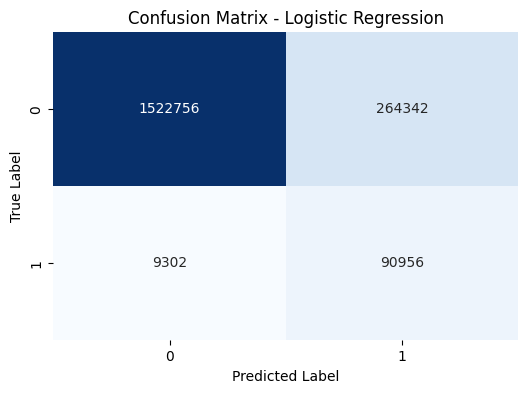

Feature Name                       Coefficient    Odds Ratio
-------------------------------  -------------  ------------
age                                    0.55454       1.74115
duration                               0.58160       1.78889
srl_no_of_act                         -0.16178       0.85063
Gender_2                              -0.62555       0.53497
Gender_3                              -0.02396       0.97633
whether_major_act_2                   -1.75422       0.17304
highest level of education_2.0        -0.59438       0.55191
highest level of education_3.0        -0.08620       0.91741
highest level of education_4.0         0.08027       1.08358
highest level of education_5.0         0.14947       1.16122
highest level of education_6.0         0.11265       1.11925
highest level of education_7.0         0.19822       1.21923
highest level of education_8.0         0.30324       1.35424
highest level of education_10.0        0.46600       1.59361
highest level of educati

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from tabulate import tabulate

# Features and target variable
features = [
    'Gender', 'highest level of education', 'duration', 'where_performed', 
    'whether_major_act', 'whether_multiple_act', 'age', 'srl_no_of_act','day'
]
target = 'activity_type'

# Select relevant columns
X = combined_df[features]
y = combined_df[target]

# Encode the target variable
y = y.apply(lambda x: 1 if x == 'Paid' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = ['age','duration','srl_no_of_act']
categorical_cols = ['Gender', 'whether_major_act', 'highest level of education', 'where_performed','day','whether_multiple_act']

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore',drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create logistic regression model
logistic_regression = LogisticRegression(class_weight='balanced')

# Create a pipeline that combines preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logistic_regression)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy after tuning:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Extracting coefficients and odds ratios
model = pipeline.named_steps['classifier']
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)
intercept_odds = np.exp(model.intercept_)

# Prepare data for the table
categorical_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_columns = list(numerical_cols) + list(categorical_columns)
table_data = []
for feature, coef, odds_ratio in zip(all_columns, coefficients, odds_ratios):
    table_data.append([feature, coef, odds_ratio])

# Add intercept to the table
intercept_row = ["Intercept", model.intercept_[0], intercept_odds]
table_data.append(intercept_row)

# Print table using tabulate
print(tabulate(table_data, headers=["Feature Name", "Coefficient", "Odds Ratio"], floatfmt=".5f"))


Logistic Regression Accuracy after tuning: 0.8547754854312668
              precision    recall  f1-score   support

           0       0.99      0.85      0.92   7145418
           1       0.26      0.91      0.40    404003

    accuracy                           0.85   7549421
   macro avg       0.63      0.88      0.66   7549421
weighted avg       0.95      0.85      0.89   7549421

[[6086335 1059083]
 [  37278  366725]]


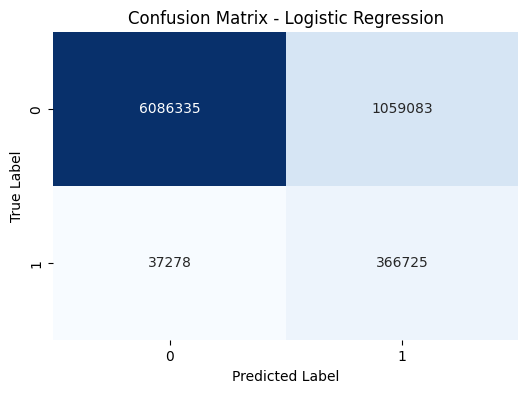

In [19]:
# Predict on the test data
y_pred = pipeline.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print("Logistic Regression Accuracy after tuning:", accuracy)
print(classification_report(y_train, y_pred))

# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


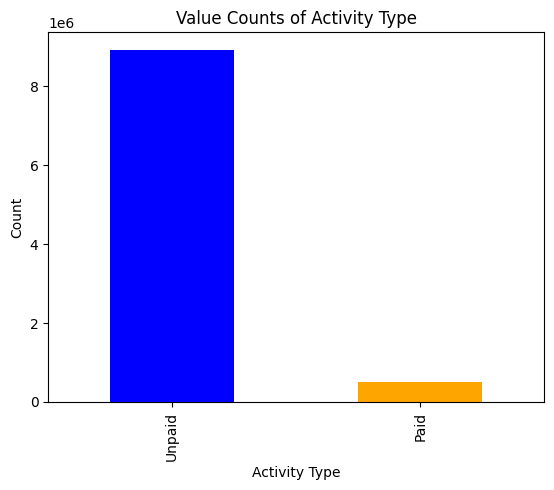

In [42]:
activity_type_counts = combined_df['activity_type'].value_counts()
activity_type_counts.plot(kind='bar', color=['blue', 'orange'])

plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.title('Value Counts of Activity Type')
plt.show()

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from tabulate import tabulate

# Features and target variable
features = [
    'Gender', 'highest level of education', 'duration', 'where_performed', 
    'whether_major_act', 'whether_multiple_act', 'age', 'srl_no_of_act', 'day'
]
target = 'activity_type'

# Select relevant columns
X = combined_df[features]
y = combined_df[target]

# Encode the target variable
y = y.apply(lambda x: 1 if x == 'Paid' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = ['age', 'duration', 'srl_no_of_act']
categorical_cols = ['Gender', 'whether_major_act', 'highest level of education', 'where_performed', 'day']

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create logistic regression model
logistic_regression = LogisticRegression(class_weight='balanced')

# Create a pipeline that combines preprocessing, SMOTE, and model
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', logistic_regression)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy after tuning:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Extracting coefficients and odds ratios
model = pipeline.named_steps['classifier']
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)
intercept_odds = np.exp(model.intercept_)

# Prepare data for the table
categorical_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_columns = list(numerical_cols) + list(categorical_columns)
table_data = []
for feature, coef, odds_ratio in zip(all_columns, coefficients, odds_ratios):
    table_data.append([feature, coef, odds_ratio])

# Add intercept to the table
intercept_row = ["Intercept", model.intercept_[0], intercept_odds]
table_data.append(intercept_row)

# Print table using tabulate
print(tabulate(table_data, headers=["Feature Name", "Coefficient", "Odds Ratio"], floatfmt=".5f"))


MemoryError: Unable to allocate 1023. MiB for an array with shape (332, 404003) and data type float64

C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_22992\165715546.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)
C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_22992\165715546.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Number of outliers in weekdays: 11
Number of outliers in weekends: 7
Average time spent on weekdays in self-care activities per day: 15292824.00 minutes
Average time spent on weekends in self-care activities per day: 14915100.00 minutes

Levene's test statistic: 0.31648
P-value for Levene's test: 0.57373

Cleaned T-statistic: 0.13267
Cleaned P-value: 0.89446
Fail to reject null hypothesis: There is no significant difference in time spent on self-care during weekdays and weekends for age group 15-29 (after cleaning data).


In [ ]:
# Fill NaN values in 'day_of_week' with the mode
day_of_week_mode = combined_df['day_of_week'].mode()[0]
combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)

# Convert 'day_of_week' to numeric, forcing errors to NaN
combined_df['day_of_week'] = pd.to_numeric(combined_df['day_of_week'], errors='coerce')

# Fill any newly introduced NaNs with the mode again
combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)

# Convert 'day_of_week' to integers
combined_df['day_of_week'] = combined_df['day_of_week'].astype(int)

# Classify days into 'Weekday' and 'Weekend'
combined_df['day'] = np.where(combined_df['day_of_week'].isin([1, 2, 3, 4, 5]), 'Weekday', 'Weekend')

# Filter the dataset for self-care activities
self_care = combined_df[combined_df['unpaid_paid_status'] == 1].copy()

# Calculate total daily duration of self-care activities for each individual
self_care['daily_duration'] = self_care.groupby(['Common_ID', 'srl_of_member'])['duration'].transform('sum')

# Remove duplicates to keep one entry per individual per day
self_care = self_care.drop_duplicates(subset=['Common_ID', 'srl_of_member'])

# Separate the data by weekdays and weekends
weekdays = self_care[self_care['day'] == 'Weekday'].copy()
weekends = self_care[self_care['day'] == 'Weekend'].copy()

# Extract the daily duration series
weekdays_duration = weekdays['daily_duration']
weekends_duration = weekends['daily_duration']

# Calculate outlier boundaries using IQR
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), outliers

# Count and remove outliers for weekdays and weekends
weekday_outliers_count, weekday_outliers = count_outliers_iqr(weekdays_duration)
weekend_outliers_count, weekend_outliers = count_outliers_iqr(weekends_duration)

# Remove outliers
weekdays_cleaned = weekdays_duration[~weekdays_duration.isin(weekday_outliers)]
weekends_cleaned = weekends_duration[~weekends_duration.isin(weekend_outliers)]

# Print the number of outliers
print(f"Number of outliers in weekdays: {weekday_outliers_count}")
print(f"Number of outliers in weekends: {weekend_outliers_count}")

# Calculate the average time spent
average_time_weekdays = weekdays_cleaned.mean()
average_time_weekends = weekends_cleaned.mean()

print(f"Average time spent on weekdays in self-care activities: {average_time_weekdays:.5f} minutes")
print(f"Average time spent on weekends in self-care activities: {average_time_weekends:.5f} minutes")

# Perform Levene's test for equality of variances
levene_stat, levene_p_value = stats.levene(weekdays_cleaned, weekends_cleaned)

print(f"\nLevene's test statistic: {levene_stat:.5f}")
print(f"P-value for Levene's test: {levene_p_value:.5f}")

# Based on Levene's test, decide if equal variance assumption holds
equal_var = levene_p_value > 0.05

# Perform t-test
t_stat_cleaned, p_value_cleaned = stats.ttest_ind(weekdays_cleaned.dropna(), weekends_cleaned.dropna(), equal_var=equal_var)

print(f"\nCleaned T-statistic: {t_stat_cleaned:.5f}")
print(f"Cleaned P-value: {p_value_cleaned:.5f}")

# Decision based on p-value
alpha = 0.05
if p_value_cleaned < alpha:
    print("Reject null hypothesis: There is a significant difference in time spent on self-care during weekdays and weekends (after cleaning data).")
else:
    print("Fail to reject null hypothesis: There is no significant difference in time spent on self-care during weekdays and weekends (after cleaning data).")


In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9436777 entries, 0 to 9436776
Data columns (total 19 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Common_ID                   object        
 1   srl_of_member               int64         
 2   age                         int64         
 3   srl_no_of_act               int64         
 4   time_from                   datetime64[ns]
 5   time_to                     datetime64[ns]
 6   whether_multiple_act        float64       
 7   whether_simul_act           float64       
 8   whether_major_act           int64         
 9   3d_act_code                 int64         
 10  where_performed             int64         
 11  unpaid_paid_status          int64         
 12  enterprise_type             float64       
 13  duration                    float64       
 14  activity_type               object        
 15  Gender                      int64         
 16  highest level of e

Gender
2    4468728
1    3858517
3       2222
Name: count, dtype: int64


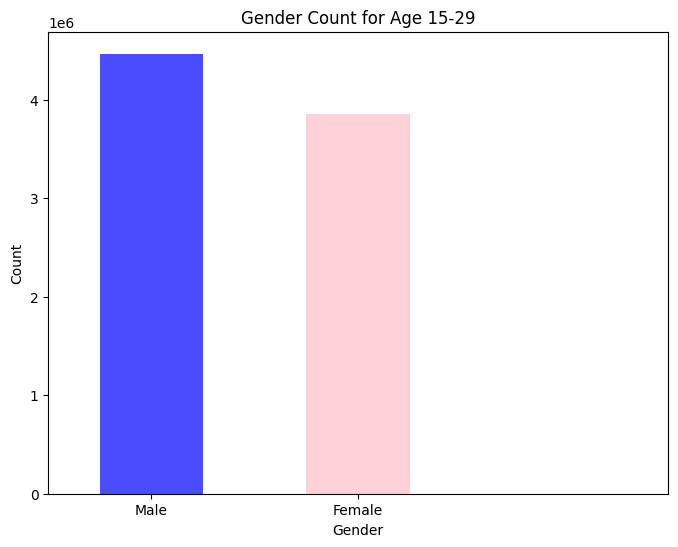

In [22]:
# Filter the dataset for the specified age group
age_filtered_df = combined_df[(combined_df['age'] >= 6) & (combined_df['age'] <= 59)]

# Group by Gender and count the occurrences
gender_count = age_filtered_df['Gender'].value_counts()

# Filter out the third category (if gender is coded as 1 for male and 2 for female)
gender_count = gender_count[gender_count.index.isin([1, 2,3])]

print(gender_count)
# Plot the data using a bar chart
plt.figure(figsize=(8, 6))
gender_count.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count for Age 15-29')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()


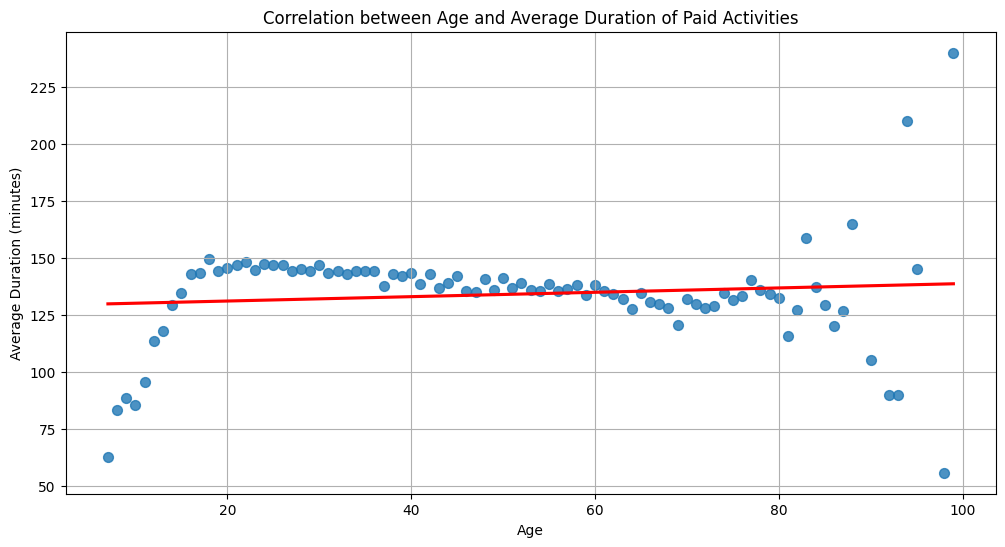

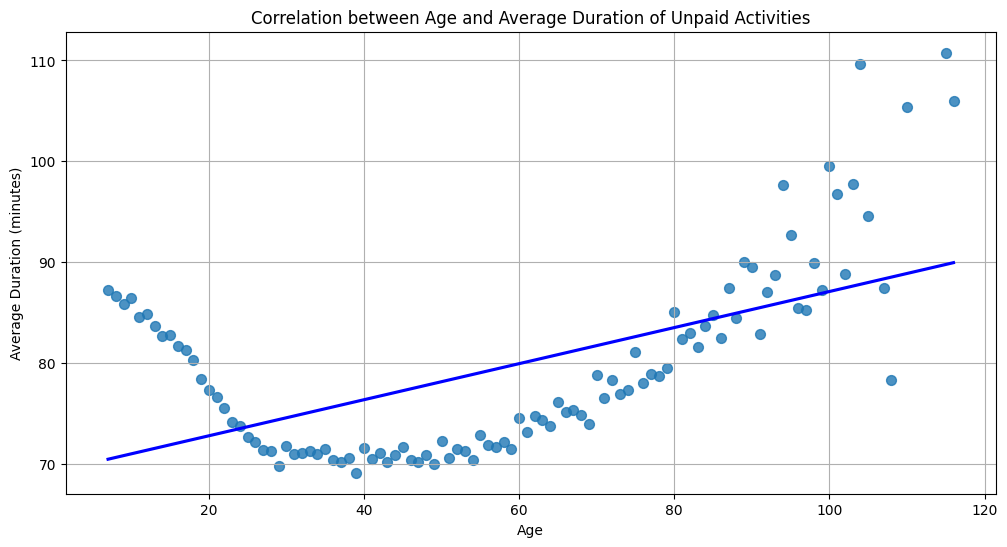

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is your DataFrame

# Filter the dataset for ages greater than 6
age_filtered_df = combined_df[combined_df['age'] > 6]

# Group by age and activity type, then calculate the average duration
average_duration_by_age = age_filtered_df.groupby(['age', 'activity_type'])['duration'].mean().reset_index()

# Separate the data for paid and unpaid activities
paid_data = average_duration_by_age[average_duration_by_age['activity_type'] == 'Paid']
unpaid_data = average_duration_by_age[average_duration_by_age['activity_type'] == 'Unpaid']

# Plot for paid activities
plt.figure(figsize=(12, 6))
sns.regplot(x='age', y='duration', data=paid_data, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=None)
plt.xlabel('Age')
plt.ylabel('Average Duration (minutes)')
plt.title('Correlation between Age and Average Duration of Paid Activities')
plt.grid(True)
plt.show()

# Plot for unpaid activities
plt.figure(figsize=(12, 6))
sns.regplot(x='age', y='duration', data=unpaid_data, scatter_kws={'s': 50}, line_kws={'color': 'blue'}, ci=None)
plt.xlabel('Age')
plt.ylabel('Average Duration (minutes)')
plt.title('Correlation between Age and Average Duration of Unpaid Activities')
plt.grid(True)
plt.show()

In [28]:
from scipy import stats

# Assuming paid_data and unpaid_data are your DataFrames with 'age' and 'duration'

# Calculate Pearson's correlation coefficient (r) for paid activities
r_paid, _ = stats.pearsonr(paid_data['age'], paid_data['duration'])
print(f"Pearson's correlation coefficient (r) for Paid activities: {r_paid:.5f}")

# Calculate Pearson's correlation coefficient (r) for unpaid activities
r_unpaid, _ = stats.pearsonr(unpaid_data['age'], unpaid_data['duration'])
print(f"Pearson's correlation coefficient (r) for Unpaid activities: {r_unpaid:.5f}")


Pearson's correlation coefficient (r) for Paid activities: 0.10696
Pearson's correlation coefficient (r) for Unpaid activities: 0.57810


In [29]:
#Calculate R-squared for paid activities
slope_paid, intercept_paid, r_value_paid, p_value_paid, std_err_paid = stats.linregress(paid_data['age'], paid_data['duration'])
r_squared_paid = r_value_paid ** 2
print(f"R-squared for Paid activities: {r_squared_paid:.5f}")

# Calculate R-squared for unpaid activities
slope_unpaid, intercept_unpaid, r_value_unpaid, p_value_unpaid, std_err_unpaid = stats.linregress(unpaid_data['age'], unpaid_data['duration'])
r_squared_unpaid = r_value_unpaid ** 2
print(f"R-squared for Unpaid activities: {r_squared_unpaid:.5f}")


R-squared for Paid activities: 0.01144
R-squared for Unpaid activities: 0.33420


In [38]:
combined_df['unpaid_paid_status'].value_counts()

unpaid_paid_status
1     7105664
3     1416237
2      240411
4      149722
16     126289
13     124959
14      89129
17      88651
15      38177
18      37056
6       10125
5        4857
8        2093
7        1719
12        688
11        574
10        245
9         181
Name: count, dtype: int64

In [48]:
# Classify activities as paid or unpaid
paid_status = [13, 14, 17, 18]
combined_df['activity_type'] = np.where(combined_df['unpaid_paid_status'].astype(int).isin(paid_status), 'Paid', 'Unpaid')

In [52]:
from scipy import stats

# Assuming paid_data and unpaid_data are your DataFrames with 'age' and 'duration'
# Filter the dataset for ages greater than 6
age_filtered_df = combined_df[combined_df['age'] > 6]

# Group by age and activity type, then calculate the average duration
average_duration_by_age = age_filtered_df.groupby(['age', 'activity_type'])['duration'].mean().reset_index()

# Separate the data for paid and unpaid activities
paid_data = average_duration_by_age[average_duration_by_age['activity_type'] == 'Paid']
unpaid_data = average_duration_by_age[average_duration_by_age['activity_type'] == 'Unpaid']

# Calculate Pearson's correlation coefficient (r) for paid activities
r_paid, _ = stats.pearsonr(paid_data['age'], paid_data['duration'])
print(f"Pearson's correlation coefficient (r) for Paid activities: {r_paid:.5f}")


Pearson's correlation coefficient (r) for Paid activities: 0.01806


In [53]:
#Calculate R-squared for paid activities
slope_paid, intercept_paid, r_value_paid, p_value_paid, std_err_paid = stats.linregress(paid_data['age'], paid_data['duration'])
r_squared_paid = r_value_paid ** 2
print(f"R-squared for Paid activities: {r_squared_paid:.5f}")


R-squared for Paid activities: 0.00033


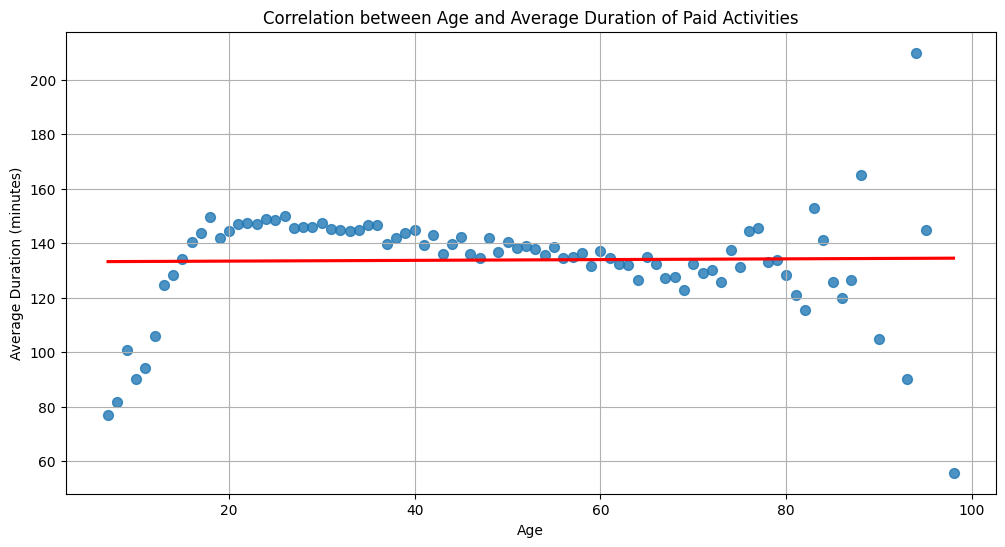

In [54]:
# Plot for paid activities
plt.figure(figsize=(12, 6))
sns.regplot(x='age', y='duration', data=paid_data, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=None)
plt.xlabel('Age')
plt.ylabel('Average Duration (minutes)')
plt.title('Correlation between Age and Average Duration of Paid Activities')
plt.grid(True)
plt.show()

In [59]:
import pandas as pd
from scipy import stats

# Filter out rows where age is greater than 6 and gender is female (gender = 2)
age_filtered = combined_df[(combined_df['age'] > 6) & (combined_df['Gender'] == 2)]

# Group by age and activity type, then calculate the average duration
average_duration_by_age = age_filtered.groupby(['age', 'unpaid_paid_status'])['duration'].mean().reset_index()

# Separate the data into self-care and domestic care giving
self_care = average_duration_by_age[average_duration_by_age['unpaid_paid_status'] == 1].rename(columns={'duration': 'self_care'})
domestic_care_giving = average_duration_by_age[average_duration_by_age['unpaid_paid_status'] == 2].rename(columns={'duration': 'domestic_care_giving'})

# Merge the two datasets on age
merged_data = pd.merge(self_care[['age', 'self_care']], domestic_care_giving[['age', 'domestic_care_giving']], on='age')

# Calculate Pearson's correlation coefficient between average time spent on self-care and domestic care giving by age
r, _ = stats.pearsonr(merged_data['self_care'], merged_data['domestic_care_giving'])
print(f"Pearson's correlation coefficient (r) between average time spent on self-care and domestic care giving by age for females: {r:.5f}")


Pearson's correlation coefficient (r) between average time spent on self-care and domestic care giving by age for females: 0.53019


In [60]:
# Classify activities as paid or unpaid
paid_status = [13, 14, 15,16,17, 18]
combined_df['activity_type'] = np.where(combined_df['unpaid_paid_status'].astype(int).isin(paid_status), 'Paid', 'Unpaid')

In [65]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming combined_df is your DataFrame and is already loaded

# Fill NaN values in 'day_of_week' with the mode
day_of_week_mode = combined_df['day_of_week'].mode()[0]
combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)

# Convert 'day_of_week' to numeric, forcing errors to NaN
combined_df['day_of_week'] = pd.to_numeric(combined_df['day_of_week'], errors='coerce')

# Fill any newly introduced NaNs with the mode again
combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)

# Convert 'day_of_week' to integers
combined_df['day_of_week'] = combined_df['day_of_week'].astype(int)

# Classify days into 'Weekday' and 'Weekend'
combined_df['day'] = np.where(combined_df['day_of_week'].isin([1, 2, 3, 4, 5]), 'Weekday', 'Weekend')

# Filter the dataset for self-care activities and gender
self_care = combined_df[(combined_df['unpaid_paid_status'] == 1) & (combined_df['Gender'] == 2)].copy()

# Calculate total daily duration of self-care activities for each individual
self_care['daily_duration'] = self_care.groupby(['Common_ID', 'srl_of_member'])['duration'].transform('sum')

# Remove duplicates to keep one entry per individual per day
self_care = self_care.drop_duplicates(subset=['Common_ID', 'srl_of_member'])

# Separate the data by weekdays and weekends
weekdays = self_care[self_care['day'] == 'Weekday'].copy()
weekends = self_care[self_care['day'] == 'Weekend'].copy()

# Extract the daily duration series
weekdays_duration = weekdays['daily_duration']
weekends_duration = weekends['daily_duration']

# Calculate outlier boundaries using IQR
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), outliers

# Count and remove outliers for weekdays and weekends
weekday_outliers_count, weekday_outliers = count_outliers_iqr(weekdays_duration)
weekend_outliers_count, weekend_outliers = count_outliers_iqr(weekends_duration)

# Remove outliers
weekdays_cleaned = weekdays_duration[~weekdays_duration.isin(weekday_outliers)]
weekends_cleaned = weekends_duration[~weekends_duration.isin(weekend_outliers)]

# Print the number of outliers
print(f"Number of outliers in weekdays: {weekday_outliers_count}")
print(f"Number of outliers in weekends: {weekend_outliers_count}")

# Calculate the average time spent
average_time_weekdays = weekdays_cleaned.mean()
average_time_weekends = weekends_cleaned.mean()

print(f"Average time spent on weekdays in self-care activities by female: {average_time_weekdays:.5f} minutes")
print(f"Average time spent on weekends in self-care activities by female: {average_time_weekends:.5f} minutes")

# Perform Levene's test for equality of variances
levene_stat, levene_p_value = stats.levene(weekdays_cleaned, weekends_cleaned)

print(f"\nLevene's test statistic: {levene_stat:.5f}")
print(f"P-value for Levene's test: {levene_p_value:.5f}")

# Based on Levene's test, decide if equal variance assumption holds
equal_var = levene_p_value > 0.05

# Perform t-test
t_stat_cleaned, p_value_cleaned = stats.ttest_ind(weekdays_cleaned.dropna(), weekends_cleaned.dropna(), equal_var=equal_var)

print(f"\nCleaned T-statistic: {t_stat_cleaned:.5f}")
print(f"Cleaned P-value: {p_value_cleaned:.5f}")

# Decision based on p-value
alpha = 0.05
if p_value_cleaned < alpha:
    print("Reject null hypothesis: There is a significant difference in time spent on self-care during weekdays and weekends by females.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in time spent on self-care during weekdays and weekends by females.")


C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_22992\3364687860.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['day_of_week'].fillna(day_of_week_mode, inplace=True)
C:\Users\Anjuli Jain\AppData\Local\Temp\ipykernel_22992\3364687860.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

Number of outliers in weekdays: 1555
Number of outliers in weekends: 569
Average time spent on weekdays in self-care activities: 1228.93901 minutes
Average time spent on weekends in self-care activities: 1225.44772 minutes

Levene's test statistic: 42.02971
P-value for Levene's test: 0.00000

Cleaned T-statistic: 2.54954
Cleaned P-value: 0.01079
Reject null hypothesis: There is a significant difference in time spent on self-care during weekdays and weekends by females.


C:\Users\Anjuli Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Accuracy: 0.9662294765799351
              precision    recall  f1-score   support

           0       0.97      0.99      0.98   1787098
           1       0.77      0.52      0.62    100258

    accuracy                           0.97   1887356
   macro avg       0.87      0.75      0.80   1887356
weighted avg       0.96      0.97      0.96   1887356

[[1771749   15349]
 [  48388   51870]]


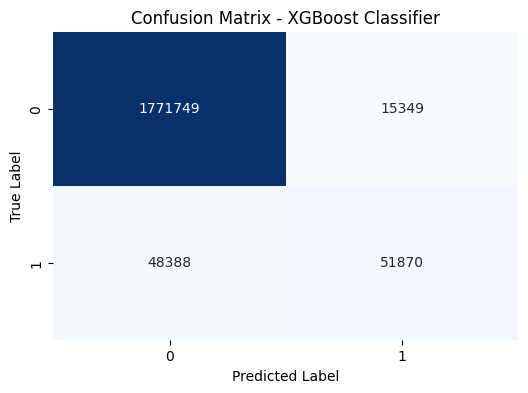

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from tabulate import tabulate

# Features and target variable
features = [
    'Gender', 'highest level of education', 'duration', 'where_performed', 
    'whether_major_act', 'whether_multiple_act', 'age', 'srl_no_of_act','day'
]
target = 'activity_type'

# Select relevant columns
X = combined_df[features]
y = combined_df[target]

# Encode the target variable
y = y.apply(lambda x: 1 if x == 'Paid' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = ['age','duration','srl_no_of_act']
categorical_cols = ['Gender', 'whether_major_act', 'highest level of education', 'where_performed','day','whether_multiple_act']

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create XGBoost model
xgboost_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', class_weight='balanced')

# Create a pipeline that combines preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgboost_classifier)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Classifier Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from tabulate import tabulate

# Features and target variable
features = [
    'Gender', 'highest level of education', 'duration', 'where_performed', 
    'whether_major_act', 'whether_multiple_act', 'age', 'srl_no_of_act', 'day'
]
target = 'activity_type'

# Select relevant columns
X = combined_df[features]
y = combined_df[target]

# Encode the target variable
y = y.apply(lambda x: 1 if x == 'Paid' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = ['age', 'duration', 'srl_no_of_act']
categorical_cols = ['Gender', 'whether_major_act', 'highest level of education', 'where_performed', 'day', 'whether_multiple_act']

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create XGBoost model
xgboost_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create a pipeline that combines preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgboost_classifier)
])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9],
    'classifier__gamma': [0, 0.1, 0.2]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score found: ", grid_search.best_score_)

# Predict on the test data with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Classifier Accuracy after hypertuning:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - XGBoost Classifier (Hypertuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Fitting 3 folds for each of 486 candidates, totalling 1458 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from tabulate import tabulate
from scipy.stats import uniform, randint

# Features and target variable
features = [
    'Gender', 'highest level of education', 'duration', 'where_performed', 
    'whether_major_act', 'whether_multiple_act', 'age', 'srl_no_of_act', 'day'
]
target = 'activity_type'

# Select relevant columns
X = combined_df[features]
y = combined_df[target]

# Encode the target variable
y = y.apply(lambda x: 1 if x == 'Paid' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = ['age', 'duration', 'srl_no_of_act']
categorical_cols = ['Gender', 'whether_major_act', 'highest level of education', 'where_performed', 'day', 'whether_multiple_act']

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create XGBoost model
xgboost_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create a pipeline that combines preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgboost_classifier)
])

# Define the parameter distribution
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': randint(3, 10),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__subsample': uniform(0.7, 0.3),
    'classifier__colsample_bytree': uniform(0.7, 0.3),
    'classifier__gamma': uniform(0, 0.2)
}

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy score found: ", random_search.best_score_)

# Predict on the test data with the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Classifier Accuracy after hypertuning:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - XGBoost Classifier (Hypertuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Anjuli Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Exception in thread ExecutorManagerThread:
Traceback (most recent call last):
  File "C:\Users\Anjuli Jain\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\Anjuli Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py", line 602, in run
    self.process_result_item(result_item)
  File "C:\Users\Anjuli Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py", line 759, in process_result_item
    executor._adjust_process_count()
  File "C:\Users\Anjuli Jain\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\p

In [1]:
combined_df.info()

NameError: name 'combined_df' is not defined